In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

# Business Problem
1) Extract reviews of any product from ecommerce website like snapdeal and amazon

2) Perform Sentimental Analysis

# Data collection and description

Connecting to Amazon.in and Extracting Revives

In [2]:
macbook_air = []

In [3]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac

# Downloading review from Amazon.in for the MacBook Air

In [4]:
macbook_air

['\nThe M1 obliterates other laptops in price to value comparisons. While it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. It’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. If this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. It’s that good.\n',
 "\nI had fears about getting a laptop with passive cooling, even though I don't do video editing or compile big programs on the Air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this I can this thing is totally fine and wonderfulDocker works fine some issues do come up but for simple development of C++, Python apps along with Postgres SQL docker with some configurations the M1 chip has so far caused no issues.I run vscode, 

In [5]:
len(macbook_air)

240

In [6]:
rev={"review":macbook_air}

In [7]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [8]:
review_data

,review
0,"\nThe M1 obliterates other laptops in price to value comparisons. While it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. It’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. If this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. It’s that good.\n"
1,"\nI had fears about getting a laptop with passive cooling, even though I don't do video editing or compile big programs on the Air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this I can this thing is totally fine and wonderfulDocker works fine some issues do come up but for simple development of C++, Python apps along with Postgres SQL docker with some configurations the M1 chip has so far caused no issues.I run vscode, pycharm the project is not too huge but with safari or chrome running with 6-8 tabs this wonder does not heat up or cause any instability.The display is the best I have used so far, the speakers are far better than equivalent windows laptopsSome Cons:1) No simple keyboard shortcut to control keyboard backli..."
2,"\nIt's a very laptop 💻 but here are some of my observations.Screen: The screen is realy amazing movies watching and whatever task you do like reading PDFs, browsing images etc. It's a pleasant experience to eyes .Battery: Although they claim for 15-16 hours of battery life but in real time usage this has been a lot less than the claimed.On the first initial days I was getting about 8-9 hours of battery life which I guess is still good in this price range .i thought there is any manufacturing defect in my air's battery hardware. But the screen brightness and the task you're performing plays important role in deciding battery life of the laptop.On less than 50% brightness and very light task I was able to get around 12 hours of battery backup and I'm happy with that .Performance : I'm an..."
3,\nIt is worth investing in MAC because it gives whole new experience of using a laptop.\n
4,\nExcellent quality laptop except camera quality.\n
...,...
235,\nAmazing battery life and great performance\n
236,\nBest in class laptop no hanging issues\n
237,\nThe best laptop as of date.\n
238,\nGood product\n


# Cleaning the text

In [9]:
text=" ".join(review_data)

In [10]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [11]:
review_data

,review
0,"\nthe m1 obliterates other laptops in price to value comparisons. while it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. it’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. if this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. it’s that good.\n"
1,"\ni had fears about getting a laptop with passive cooling, even though i don't do video editing or compile big programs on the air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this i can this thing is totally fine and wonderfuldocker works fine some issues do come up but for simple development of c++, python apps along with postgres sql docker with some configurations the m1 chip has so far caused no issues.i run vscode, pycharm the project is not too huge but with safari or chrome running with 6-8 tabs this wonder does not heat up or cause any instability.the display is the best i have used so far, the speakers are far better than equivalent windows laptopssome cons:1) no simple keyboard shortcut to control keyboard backli..."
2,"\nit's a very laptop 💻 but here are some of my observations.screen: the screen is realy amazing movies watching and whatever task you do like reading pdfs, browsing images etc. it's a pleasant experience to eyes .battery: although they claim for 15-16 hours of battery life but in real time usage this has been a lot less than the claimed.on the first initial days i was getting about 8-9 hours of battery life which i guess is still good in this price range .i thought there is any manufacturing defect in my air's battery hardware. but the screen brightness and the task you're performing plays important role in deciding battery life of the laptop.on less than 50% brightness and very light task i was able to get around 12 hours of battery backup and i'm happy with that .performance : i'm an..."
3,\nit is worth investing in mac because it gives whole new experience of using a laptop.\n
4,\nexcellent quality laptop except camera quality.\n
...,...
235,\namazing battery life and great performance\n
236,\nbest in class laptop no hanging issues\n
237,\nthe best laptop as of date.\n
238,\ngood product\n


In [12]:
text=" ".join(review_data["review"])

In [13]:
text

'\nthe m1 obliterates other laptops in price to value comparisons. while it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. it’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. if this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. it’s that good.\n \ni had fears about getting a laptop with passive cooling, even though i don\'t do video editing or compile big programs on the air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this i can this thing is totally fine and wonderfuldocker works fine some issues do come up but for simple development of c++, python apps along with postgres sql docker with some configurations the m1 chip has so far caused no issues.i run vscode, pych

In [14]:
text_tokens = word_tokenize(text)

In [15]:
text_tokens

['the',
 'm1',
 'obliterates',
 'other',
 'laptops',
 'in',
 'price',
 'to',
 'value',
 'comparisons',
 '.',
 'while',
 'it',
 'is',
 'not',
 'necessarily',
 'the',
 'powerhouse',
 'some',
 'might',
 'claim',
 '-',
 'it',
 'breezes',
 'through',
 'almost',
 'all',
 'regular',
 'daily',
 'use',
 'scenarios',
 '.',
 'it',
 '’',
 's',
 'well',
 'built',
 '-',
 'has',
 'a',
 'keyboard',
 'that',
 '’',
 's',
 'miles',
 'better',
 'than',
 'the',
 'ones',
 'in',
 'the',
 'past',
 'few',
 'years',
 ',',
 'a',
 'decent',
 'screen',
 '-',
 'and',
 'is',
 'possibly',
 'one',
 'of',
 'the',
 'easiest',
 'macs',
 'to',
 'recommend',
 '.',
 'if',
 'this',
 'fits',
 'your',
 'budget',
 '-',
 'and',
 'you',
 '’',
 're',
 'not',
 'a',
 'heavy',
 'gamer',
 'or',
 'professional',
 'video',
 'editor',
 'or',
 'something',
 'along',
 'those',
 'lines',
 '-',
 'go',
 'for',
 'this',
 'blindly',
 '.',
 'it',
 '’',
 's',
 'that',
 'good',
 '.',
 'i',
 'had',
 'fears',
 'about',
 'getting',
 'a',
 'laptop',
 

# Create the DF

In [16]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [17]:
tf=TfidfVectorizer()

In [18]:
text_tf=tf.fit_transform(text_without_sw)

In [19]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

C:\Users\donal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df

,000,10,100,10finally,10get,10hours,10i,10k,10light,10watch,...,wt,wtf,x86,year,years,yet,you,youtube,yrs,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
words_list=" ".join(df)

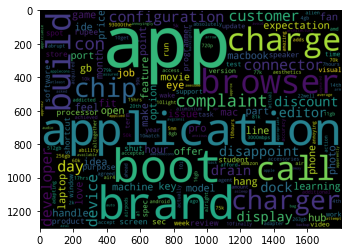

In [22]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

# Sentimental Analysis

In [23]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [25]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]

In [26]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [27]:
pos_text=" ".join([word for word in df if not word  in positive_words])

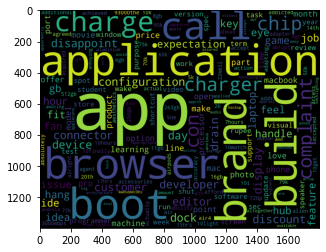

In [28]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

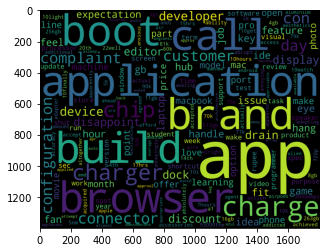

In [29]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [31]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"\nthe m1 obliterates other laptops in price to value comparisons. while it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. it’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. if this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. it’s that good.\n",0.448866,0.037821
1,"\ni had fears about getting a laptop with passive cooling, even though i don't do video editing or compile big programs on the air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this i can this thing is totally fine and wonderfuldocker works fine some issues do come up but for simple development of c++, python apps along with postgres sql docker with some configurations the m1 chip has so far caused no issues.i run vscode, pycharm the project is not too huge but with safari or chrome running with 6-8 tabs this wonder does not heat up or cause any instability.the display is the best i have used so far, the speakers are far better than equivalent windows laptopssome cons:1) no simple keyboard shortcut to control keyboard backli...",0.577381,0.190833
2,"\nit's a very laptop 💻 but here are some of my observations.screen: the screen is realy amazing movies watching and whatever task you do like reading pdfs, browsing images etc. it's a pleasant experience to eyes .battery: although they claim for 15-16 hours of battery life but in real time usage this has been a lot less than the claimed.on the first initial days i was getting about 8-9 hours of battery life which i guess is still good in this price range .i thought there is any manufacturing defect in my air's battery hardware. but the screen brightness and the task you're performing plays important role in deciding battery life of the laptop.on less than 50% brightness and very light task i was able to get around 12 hours of battery backup and i'm happy with that .performance : i'm an...",0.558684,0.427895
3,\nit is worth investing in mac because it gives whole new experience of using a laptop.\n,0.318182,0.212121
4,\nexcellent quality laptop except camera quality.\n,1.000000,1.000000
...,...,...,...
235,\namazing battery life and great performance\n,0.825000,0.700000
236,\nbest in class laptop no hanging issues\n,0.300000,1.000000
237,\nthe best laptop as of date.\n,0.300000,1.000000
238,\ngood product\n,0.600000,0.700000


In [32]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\nthe m1 obliterates other laptops in price to value comparisons. while it is not necessarily the powerhouse some might claim - it breezes through almost all regular daily use scenarios. it’s well built - has a keyboard that’s miles better than the ones in the past few years, a decent screen - and is possibly one of the easiest macs to recommend. if this fits your budget - and you’re not a heavy gamer or professional video editor or something along those lines - go for this blindly. it’s that good.\n",0.448866,0.037821,Positive
1,"\ni had fears about getting a laptop with passive cooling, even though i don't do video editing or compile big programs on the air, even for web development and writing small scripts a fanless laptop seemed like a bad idea but after using this i can this thing is totally fine and wonderfuldocker works fine some issues do come up but for simple development of c++, python apps along with postgres sql docker with some configurations the m1 chip has so far caused no issues.i run vscode, pycharm the project is not too huge but with safari or chrome running with 6-8 tabs this wonder does not heat up or cause any instability.the display is the best i have used so far, the speakers are far better than equivalent windows laptopssome cons:1) no simple keyboard shortcut to control keyboard backli...",0.577381,0.190833,Positive
2,"\nit's a very laptop 💻 but here are some of my observations.screen: the screen is realy amazing movies watching and whatever task you do like reading pdfs, browsing images etc. it's a pleasant experience to eyes .battery: although they claim for 15-16 hours of battery life but in real time usage this has been a lot less than the claimed.on the first initial days i was getting about 8-9 hours of battery life which i guess is still good in this price range .i thought there is any manufacturing defect in my air's battery hardware. but the screen brightness and the task you're performing plays important role in deciding battery life of the laptop.on less than 50% brightness and very light task i was able to get around 12 hours of battery backup and i'm happy with that .performance : i'm an...",0.558684,0.427895,Positive
3,\nit is worth investing in mac because it gives whole new experience of using a laptop.\n,0.318182,0.212121,Positive
4,\nexcellent quality laptop except camera quality.\n,1.000000,1.000000,Positive
...,...,...,...,...
235,\namazing battery life and great performance\n,0.825000,0.700000,Positive
236,\nbest in class laptop no hanging issues\n,0.300000,1.000000,Positive
237,\nthe best laptop as of date.\n,0.300000,1.000000,Positive
238,\ngood product\n,0.600000,0.700000,Positive


In [33]:
review_data['analysis'].value_counts()

Positive    191
Neutral      29
Negative     20
Name: analysis, dtype: int64

In [34]:
#positive comments
((270+35)/330)*100

92.42424242424242

In [35]:
#negative comments
(25/330)*100

7.575757575757576